<h2> IMDB dataset을 이용한 CNN + LSTM( 순환 컨볼루션 신경망 모델)</h2>

<h3> 0. 기본 소개 </h3>

<h3>DataSet: IMDB</h3>


IMDB는 Internet Movie DataBase을 뜻하며 영화에 대한 리뷰 데이터, 총 5만개의 리뷰로 이루어져 있고 훈련 데이터와 검증데이터를 각각 25000개씩 각각 50대50의 긍정리뷰와 부정리뷰를 가지고 있다.
  
<h3>CNN + LSTM (RCNN)</h3>

DCNN이 컴퓨터 비전 문제를 해결할 수 있는 좋은 모델로 평가받는다. 하지만 시각에 대한 안정성은 독립적인 것이 아닌 시간에 따라 발생하는 것이기 때문에, 시계열 데이터에 대한 연속적 예측이 필요성이 제기됨에 따라,  네트워크 구조가 이미지에서 시계열을 인식하도록 설계된 새로운 신경망 모델인 RCNN이 탄생하게 되었다.

RCNN은 시계열 label 생성이 가능하고, 단어 인식하는 측면에서 이전의 모델들 보다 훨씬 우수한 성능을 보유하고 있다, 또한<b> DCNN보다 훨씬 적은 매개변수를 필요로 하기 때문에, 차지하는 저장공간이 줄어들어서 효율적</b>이다.

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D

Using TensorFlow backend.


<h3>-> 사용할 패키지 불러오기</h3>

In [0]:
max_features = 20000
text_max_words = 200

<h3> -> 데이터셋 생성하기</h3>

In [0]:
# 1
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 2 
x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

# 3 
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)



<h3> -> 1.훈련셋과 시험셋 불러오기</h3>
<h3> -> 2. 훈련셋과 검증셋 분리 </h3>
<h3> -> 3. 데이터셋 전처리 : 문장 길이 맞추기 </h3>


In [4]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

W0805 01:47:48.045633 140344763688832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 01:47:48.118731 140344763688832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 01:47:48.129710 140344763688832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 01:47:48.212608 140344763688832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0805 01:47:48.289386 

<h3> -> 모델 구성하기 </h3>

<b>Embedding</b>

Embedding은 범주형 자료를 연속적 벡터 형태로 변환시키는 것을 말한다. 단어를 n차원의 벡터로 매핑시켜준다

<b>Dropout</b>

망의 크기가 커질 경우, Overfitting의 문제를 해결하기 위해서, 망에 있는 모든 layer를 학습 시키는 것이 아닌, 같은 망에 있는 입력 레이어나 히든 레이어의 일부 뉴런을 생략하고 줄여 효율적인 신경망 학습을 수행하도록 해준다.

<b>Conv1D</b>

합성곱(Convolution) 연산을 수행하는 역할을 한다. 1차원 상에서 CNN의 중요 레이어중 하나인 Convolutional 레이어의 연산을 수행해준다.

<b> MaxPooling1D</b>

Pooling이란, Conv연산을 거쳐서 나온 activation maps가 있을 때, 이를 이루는 Conv 레이어를 resizing하여 새로운 레이어를 얻는다. MaxPooling은 최댓값을 뽑아내준다.

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))


W0805 01:47:54.933673 140344763688832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0805 01:47:55.057881 140344763688832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0805 01:47:55.079765 140344763688832 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 366s 18ms/step - loss: 0.4090 - acc: 0.7973 - val_loss: 0.3220 - val_acc: 0.8642
Epoch 2/25
20000/20000 [==============================] - 360s 18ms/step - loss: 0.1893 - acc: 0.9288 - val_loss: 0.3613 - val_acc: 0.8500
Epoch 3/25
20000/20000 [==============================] - 358s 18ms/step - loss: 0.0971 - acc: 0.9673 - val_loss: 0.3776 - val_acc: 0.8710
Epoch 4/25
20000/20000 [==============================] - 362s 18ms/step - loss: 0.0474 - acc: 0.9859 - val_loss: 0.6639 - val_acc: 0.8516
Epoch 5/25
20000/20000 [==============================] - 361s 18ms/step - loss: 0.0401 - acc: 0.9867 - val_loss: 0.5873 - val_acc: 0.8676
Epoch 6/25
20000/20000 [==============================] - 360s 18ms/step - loss: 0.0192 - acc: 0.9947 - val_loss: 0.5999 - val_acc: 0.8618
Epoch 7/25
20000/20000 [==============================] - 360s 18ms/step - loss: 0.0171 - acc: 0.9947 - val_loss: 0.5

<h3>-> 모델 학습과정 설정하기</h3>
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

<h3> ->모델 학습시키기 </h3>
hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))


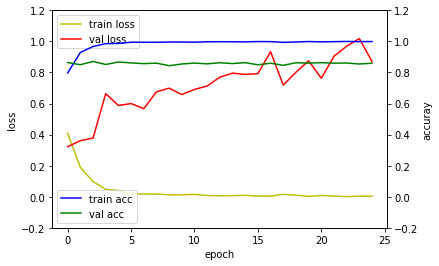

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

<h3> ->훈련과 검증 손실 분석</h3>
기존 LSTM, CNN모델과 val loss의 증가는 별 다르지 않게 증가 폭을 보였지만, LSTM보다는 완만한 증가 , CNN과 가까운 최종 val loss률을 보인다. 

In [7]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

25000/25000 [==============================] - 78s 3ms/step
## evaluation loss and_metrics ##
[1.046933840227127, 0.8327999999809265]


<h3> 최종 정확도 83%</h3>